#Aprendizaje No Supervisado – Agrupamiento de Datos

In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

Columnas de Personalidad: Las columnas op, co, ex, ag, ne en tu conjunto de datos probablemente representan cinco dimensiones o rasgos de personalidad. Estos podrían corresponder al modelo de los "Cinco Grandes" (Big Five), un modelo psicológico que clasifica los rasgos de personalidad en cinco amplias categorías:

* O (Openness - Apertura a la experiencia)
* C (Conscientiousness - Responsabilidad)
* E (Extraversion - Extraversión)
* A (Agreeableness - Amabilidad)
* N (Neuroticism - Neuroticismo)

In [32]:
path="/content/analisistwitter.csv"
df = pd.read_csv(path)
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [33]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

agrupamos

In [34]:
# Creando un diccionario para mapear los números a las categorías
categorias_dict = {
    1: "Actor/actriz",
    2: "Cantante",
    3: "Modelo",
    4: "Tv, series",
    5: "Radio",
    6: "Tecnología",
    7: "Deportes",
    8: "Politica",
    9: "Escritor"
}

# Creando una nueva columna en el DataFrame basada en la columna 'categoria'
df['categoria_nombre'] = df['categoria'].map(categorias_dict)

# Ahora puedes imprimir el tamaño del grupo para cada categoría por su nombre
print(df.groupby('categoria_nombre').size())


categoria_nombre
Actor/actriz    27
Cantante        34
Deportes        17
Escritor         6
Modelo           9
Politica        16
Radio            4
Tecnología       8
Tv, series      19
dtype: int64


Tenemos 34 cantantes, 27 actores, 17 deportistas, 16 políticos

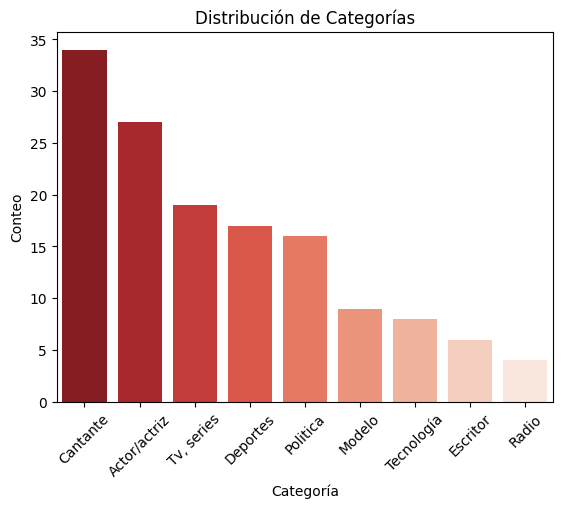

In [35]:
import seaborn as sns

# Datos proporcionados para el gráfico
categoria_counts_manual = {
    "Actor/actriz": 27,
    "Cantante": 34,
    "Deportes": 17,
    "Escritor": 6,
    "Modelo": 9,
    "Politica": 16,
    "Radio": 4,
    "Tecnología": 8,
    "Tv, series": 19
}

# Convertir el diccionario en una Serie de pandas y ordenarla de manera descendente
categoria_counts_serie = pd.Series(categoria_counts_manual).sort_values(ascending=False)

# Creando un gráfico de barras con una paleta de colores roja
sns.barplot(x=categoria_counts_serie.index, y=categoria_counts_serie.values, palette="Reds_r")
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()


<Figure size 2000x1500 with 0 Axes>

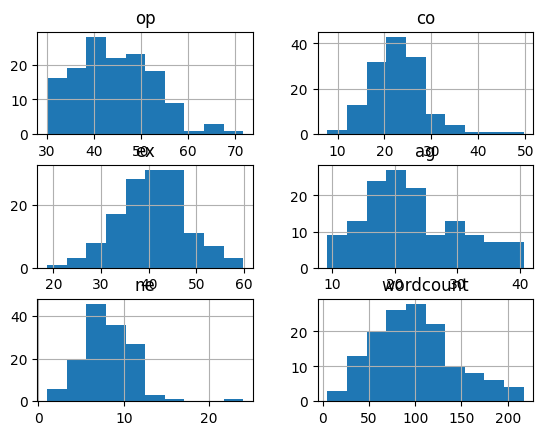

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Ajusta estos valores según tus necesidades
df.drop(['categoria'], axis=1).hist()
plt.show()


En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


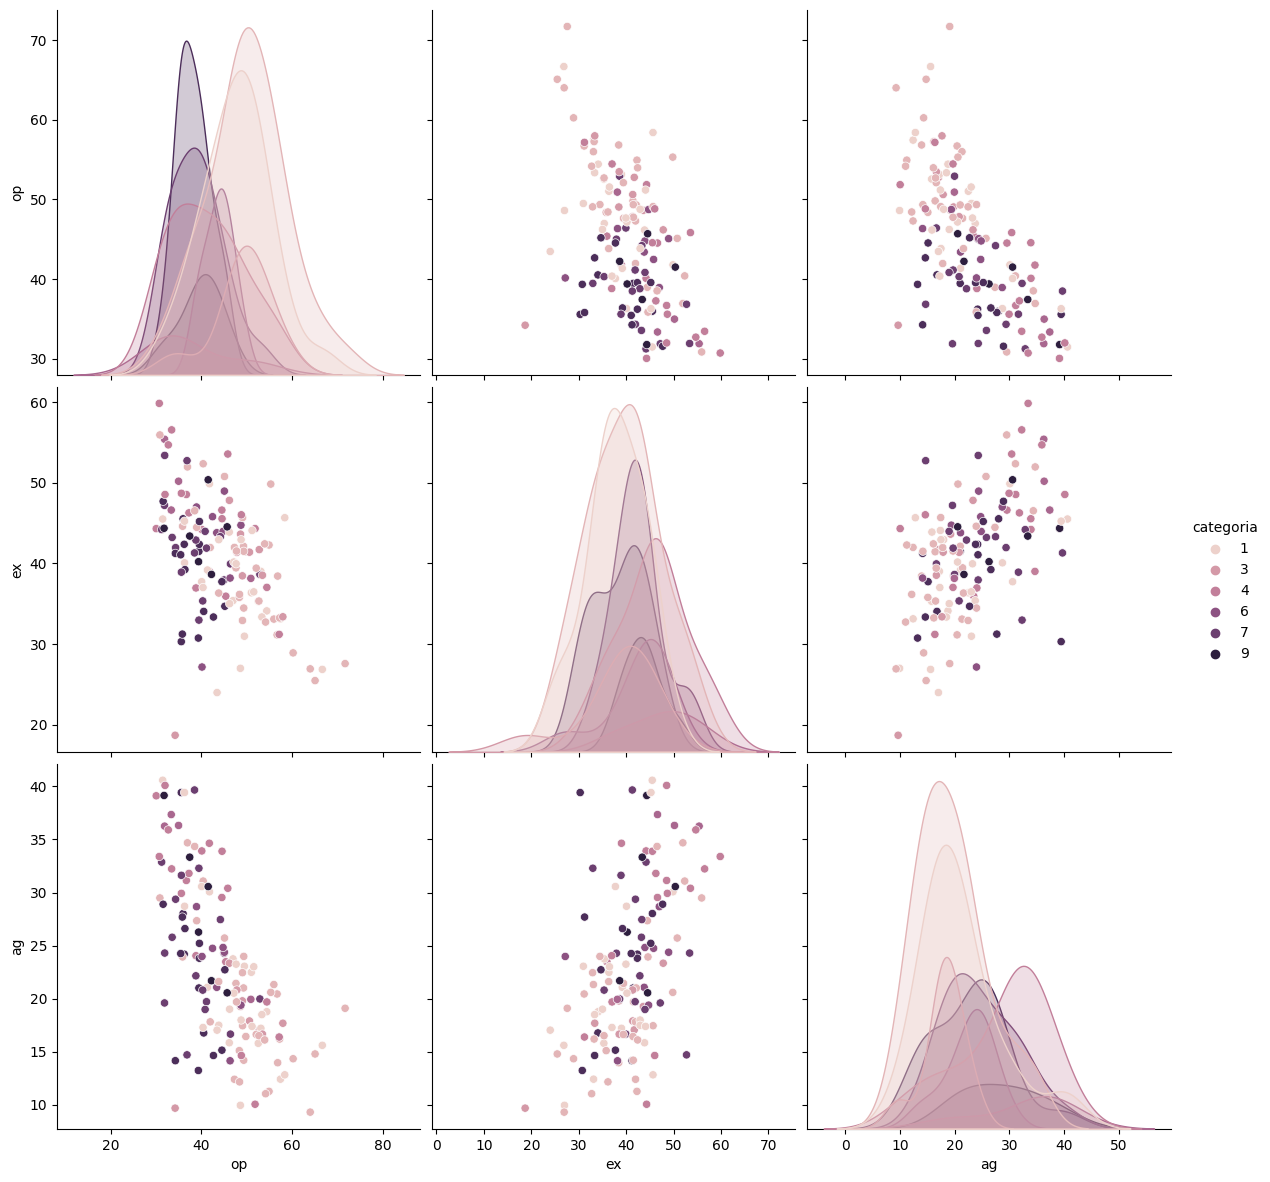

In [37]:
	sb.pairplot(df.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

Definimos la entrada
Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [38]:
X = np.array(df[["op","ex","ag","ne","co"]])
y = np.array(df['categoria'])
X.shape

(140, 5)

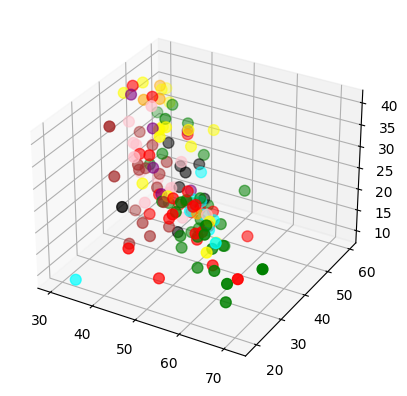

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np  # Asumiendo que necesitas NumPy

# Asumiendo que X es un array con 3 columnas (para las coordenadas x, y, z)
# y y es un array con etiquetas.

# Crear una figura para el gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir colores. Asegúrate de tener suficientes colores para todas las etiquetas en y.
colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']

# Asignar colores a cada punto basado en su etiqueta
asignar = [colores[label] for label in y]

# Dibujar el gráfico de dispersión
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

# Mostrar el gráfico
plt.show()


Este código es típicamente utilizado para visualizar agrupaciones o distribuciones de datos en tres dimensiones, y es especialmente útil en análisis no supervisado, como el agrupamiento (clustering), donde deseas visualizar cómo los datos están agrupados en el espacio.







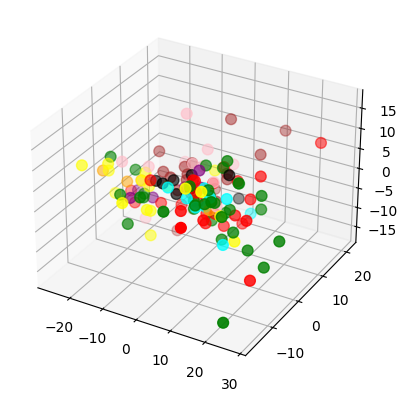

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tus datos originales
X = np.array(df[["op", "ex", "ag", "ne", "co"]])

# Crear y ajustar el modelo PCA. Aquí se reducen los datos a 3 dimensiones para visualización
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Crear una figura para el gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar los mismos colores que antes
colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = [colores[label] for label in y]  # Asegúrate de que 'y' esté definido como antes

# Dibujar el gráfico de dispersión con los datos transformados
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=asignar, s=60)

# Mostrar el gráfico
plt.show()


La razón principal para aplicar PCA a tus datos es reducir la dimensionalidad, lo cual es especialmente útil para facilitar la visualización y la comprensión de los datos cuando tienes muchas dimensiones. En tu caso, tienes un conjunto de datos de 5 dimensiones, y aunque estás visualizando en 3D, la reducción a través de PCA puede ayudarte a captar mejor las tendencias y patrones subyacentes.

El propósito de aplicar PCA y luego visualizar los datos no es necesariamente cambiar la apariencia del gráfico (de 3D a 2D o seguir siendo 3D), sino transformar los datos para resaltar su estructura interna. Con PCA, las nuevas dimensiones (componentes principales) son combinaciones lineales de tus dimensiones originales y capturan la mayor variabilidad posible de tus datos.

Si visualizas los datos en 3D antes y después de PCA, los gráficos pueden parecer similares en términos de ser ambos tridimensionales, pero los ejes habrán cambiado: ya no representan tus variables originales, sino las componentes principales.

Si deseas ver un cambio más notable en la visualización, podrías reducir tus datos a 2 dimensiones usando PCA y luego crear un gráfico de dispersión 2D. Esto puede darte una perspectiva diferente sobre la estructura de tus datos.

Aquí te muestro cómo hacerlo:

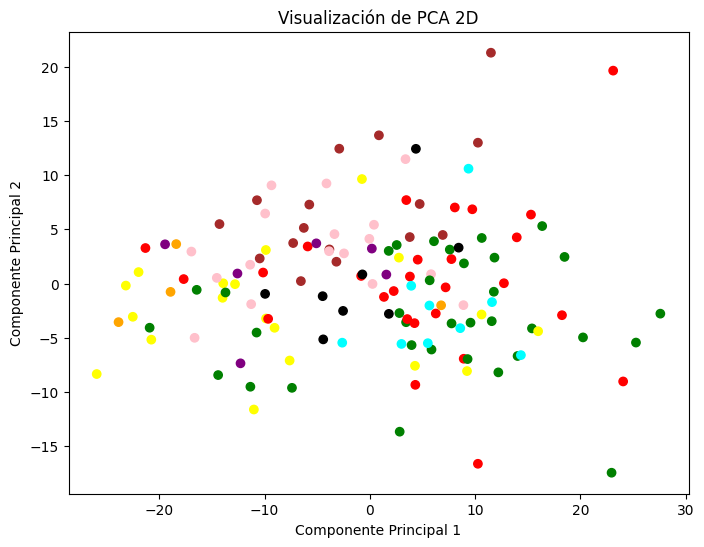

In [41]:
# Crear y ajustar el modelo PCA para reducir a 2 dimensiones
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Crear un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=asignar)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de PCA 2D')
plt.show()


* Transformación de Datos: En tu caso original, tienes un conjunto de datos de 5 dimensiones (las columnas "op", "ex", "ag", "ne", "co"). Cuando aplicas PCA y eliges, por ejemplo, reducir tus datos a 2 dimensiones, PCA encuentra las dos "direcciones" (componentes principales) en tus datos que capturan la mayor variabilidad posible.

* Nuevas Dimensiones: Estas dos nuevas dimensiones son combinaciones lineales de tus 5 dimensiones originales. No son simplemente dos de tus cinco columnas originales, sino nuevas columnas que representan la mayoría de la información contenida en todas las cinco columnas originales.

* Interpretación: Al reducir la dimensionalidad, se facilita la visualización y a menudo se hace más sencillo identificar patrones o agrupaciones. Sin embargo, esta reducción viene a costa de perder algo de información. En muchos casos, las primeras dos o tres componentes principales pueden capturar una gran parte de la variabilidad de los datos, lo que las hace muy útiles para análisis y visualización.

* ¿Con cuáles te quedas?: Al final, te quedas con las componentes principales que proporciona PCA, no con tus variables originales. Estas componentes te dan una nueva manera de ver y analizar tus datos, destacando las características más importantes y reduciendo la complejidad.

Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

Obtener el valor K
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

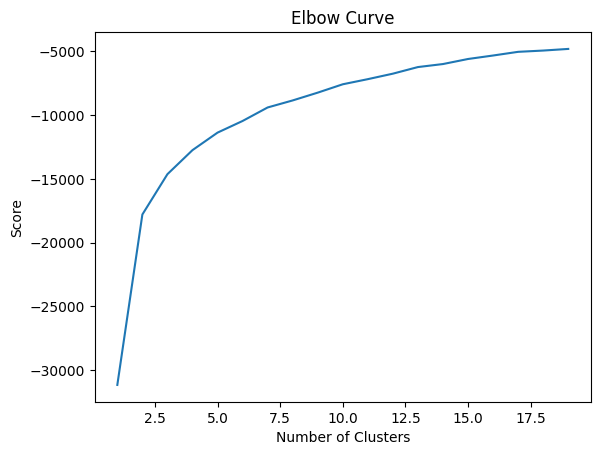

In [42]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

Ejecutamos K-Means
Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [43]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[44.08087206 38.06016739 15.86293372  9.15290483 32.09285783]
 [36.33945629 47.12833221 32.09047917  7.32774698 18.47112721]
 [41.8884911  37.01059523 23.20867142  9.44756648 23.80989513]
 [50.12128278 42.29396247 18.11709766  7.66731    22.127281  ]
 [58.58268182 31.87127618 16.23794359  6.42750271 24.53884824]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

<Figure size 2000x2000 with 0 Axes>

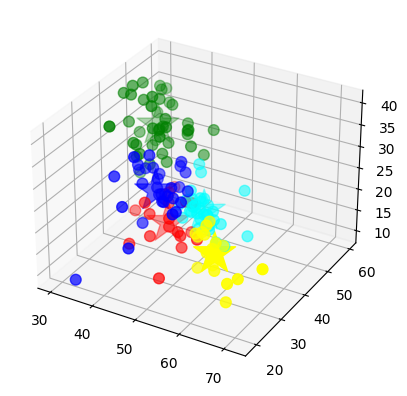

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Asumo que tienes tus datos en X y que ya has ajustado el modelo KMeans.
# Por ejemplo:
# kmeans = KMeans(n_clusters=5).fit(X)

# Prediciendo los clusters
labels = kmeans.predict(X)

# Obteniendo los centros de los clusters
C = kmeans.cluster_centers_

# Definiendo colores para cada cluster
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = [colores[label] for label in labels]

# Creando la figura y el eje para un gráfico 3D
fig = plt.figure(figsize=(20, 20))  # Ajusta estos valores según tus necesidades
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujando los puntos de los datos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

# Dibujando los centros de los clusters
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

# Mostrando el gráfico
plt.show()


Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.



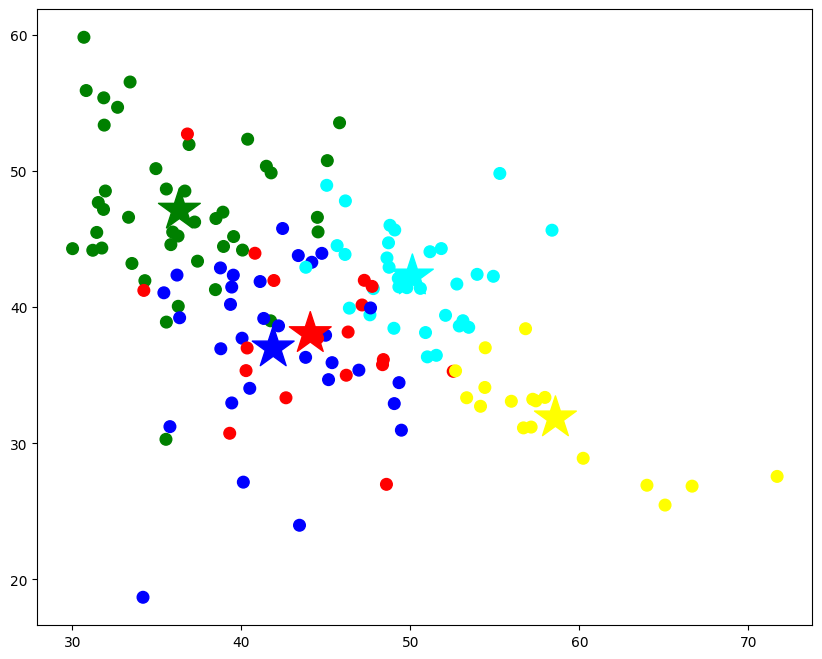

In [45]:

# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ex'].values
fig = plt.figure(figsize=(10, 8))  # Ajusta estos valores según tus necesidades
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [47]:
import pandas as pd

# Asumiendo que tienes un DataFrame 'dataframe' con las columnas de personalidad y 'labels' con las etiquetas de cluster

# Añadiendo la columna de etiquetas de cluster al DataFrame
df['cluster_label'] = labels

# Calculando las medias por cluster para cada rasgo de personalidad
cluster_means = df.groupby('cluster_label').mean()

print(cluster_means)


                      op         co         ex         ag        ne  \
cluster_label                                                         
0              44.080872  32.092858  38.060167  15.862934  9.152905   
1              36.339456  18.471127  47.128332  32.090479  7.327747   
2              41.888491  23.809895  37.010595  23.208671  9.447566   
3              50.121283  22.127281  42.293962  18.117098  7.667310   
4              58.582682  24.538848  31.871276  16.237944  6.427503   

                wordcount  categoria  
cluster_label                         
0              124.912411   4.111111  
1               66.279726   4.738095  
2              109.643094   5.290323  
3              110.017287   2.968750  
4              109.912159   2.058824  


<ipython-input-47-8deeec3d1fa3>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster_label').mean()


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [48]:
# Asumiendo que dataframe y labels están definidos como antes.

copy = pd.DataFrame()
copy['usuario'] = df['usuario'].values
copy['categoria'] = df['categoria'].values
copy['label'] = labels

# Creando cantidadGrupo
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()

# Agrupando categorías por grupo y convirtiendo los elementos a cadenas
categorias_por_grupo = copy.groupby('label')['categoria'].unique().apply(lambda x: ', '.join(map(str, x)))

# Asegurándote de que los índices coincidan
categorias_por_grupo = categorias_por_grupo.reindex(cantidadGrupo.index)

# Agregando la columna de categorías al DataFrame cantidadGrupo
cantidadGrupo['categorias'] = categorias_por_grupo.values

cantidadGrupo


,color,cantidad,categorias
0,red,18,"2, 8, 1, 7, 6"
1,green,42,"7, 4, 2, 5, 8, 1, 6, 9"
2,blue,31,"7, 1, 8, 6, 3, 4, 9, 2"
3,cyan,32,"7, 3, 2, 1, 6, 4, 5, 9"
4,yellow,17,"1, 2, 4, 3"


Color: Representa los colores asignados a cada uno de los grupos o "clusters" identificados por el algoritmo de agrupamiento. Cada color (rojo, verde, azul, cian, amarillo) representa un grupo distinto.

Cantidad: Indica el número de elementos o puntos de datos que han sido asignados a cada grupo. Por ejemplo, hay 30 puntos en el grupo rojo, 42 en el verde, y así sucesivamente.

Categorías: Esta columna lista las categorías únicas que se encuentran en cada grupo. Las categorías están representadas por números (como 1, 2, 3, etc.). Estos números representan diferentes categorías o etiquetas que estaban presentes en tus datos originales. Por ejemplo, en el grupo rojo (red), las categorías 4, 2, 5, 7, 1, 8, y 9 están presentes.

Interpretación:
* Grupos/Clusters: Cada color representa un grupo distinto de datos. Los algoritmos de agrupamiento intentan agrupar los puntos de datos de manera que los puntos dentro de un mismo grupo sean más similares entre sí que con los puntos de otros grupos. La "similitud" depende de cómo se miden las distancias entre los puntos en el espacio de características de tus datos.

* Tamaño de los Grupos: La columna "cantidad" te dice cuántos puntos de datos hay en cada grupo. Esto puede darte una idea de la distribución de tus datos. Por ejemplo, el grupo verde es el más grande con 42 puntos, mientras que el cian es el más pequeño con 15 puntos.

* Composición de los Grupos: La columna "categorias" muestra qué categorías originales se encuentran más frecuentemente juntas en cada grupo. Esto puede ser útil para entender cómo las diferentes categorías se relacionan entre sí en tus datos. Por ejemplo, si ciertas categorías siempre aparecen juntas en un mismo grupo, puede indicar una relación o similitud entre ellas en el contexto de tus datos.



Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [50]:
from sklearn.metrics import pairwise_distances_argmin_min

# Asumiendo que kmeans y X están definidos como antes.
# Asumiendo también que 'dataframe' es tu DataFrame original y que tiene una columna 'usuario'

# Calculando el punto más cercano a cada centroide del cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

# Obteniendo los nombres de los usuarios más cercanos a cada centroide
usuarios_cercanos = df.iloc[closest]['usuario']

for i, usuario in enumerate(usuarios_cercanos):
    print(f"Cluster {i}: Usuario más cercano al centroide = {usuario}")


Cluster 0: Usuario más cercano al centroide = SJP
Cluster 1: Usuario más cercano al centroide = alfredocasero1
Cluster 2: Usuario más cercano al centroide = thelittleidiot
Cluster 3: Usuario más cercano al centroide = LeoDiCaprio
Cluster 4: Usuario más cercano al centroide = JLo


En los centros vemos que tenemos una modelo, un político, presentadora de Tv, locutor de Radio y un deportista.

El algoritmo de K-means nos ayudará a crear clusters cuando tengamos grandes grupos de datos sin etiquetar, cuando queramos intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que tengamos de nuestro negocio.

Atención: Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará “k clusters”, quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas. También tener en cuenta que en este ejemplo estamos utilizando como medida de similitud entre features la distancia Euclideana pero podemos utilizar otras diversas funciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, etc).

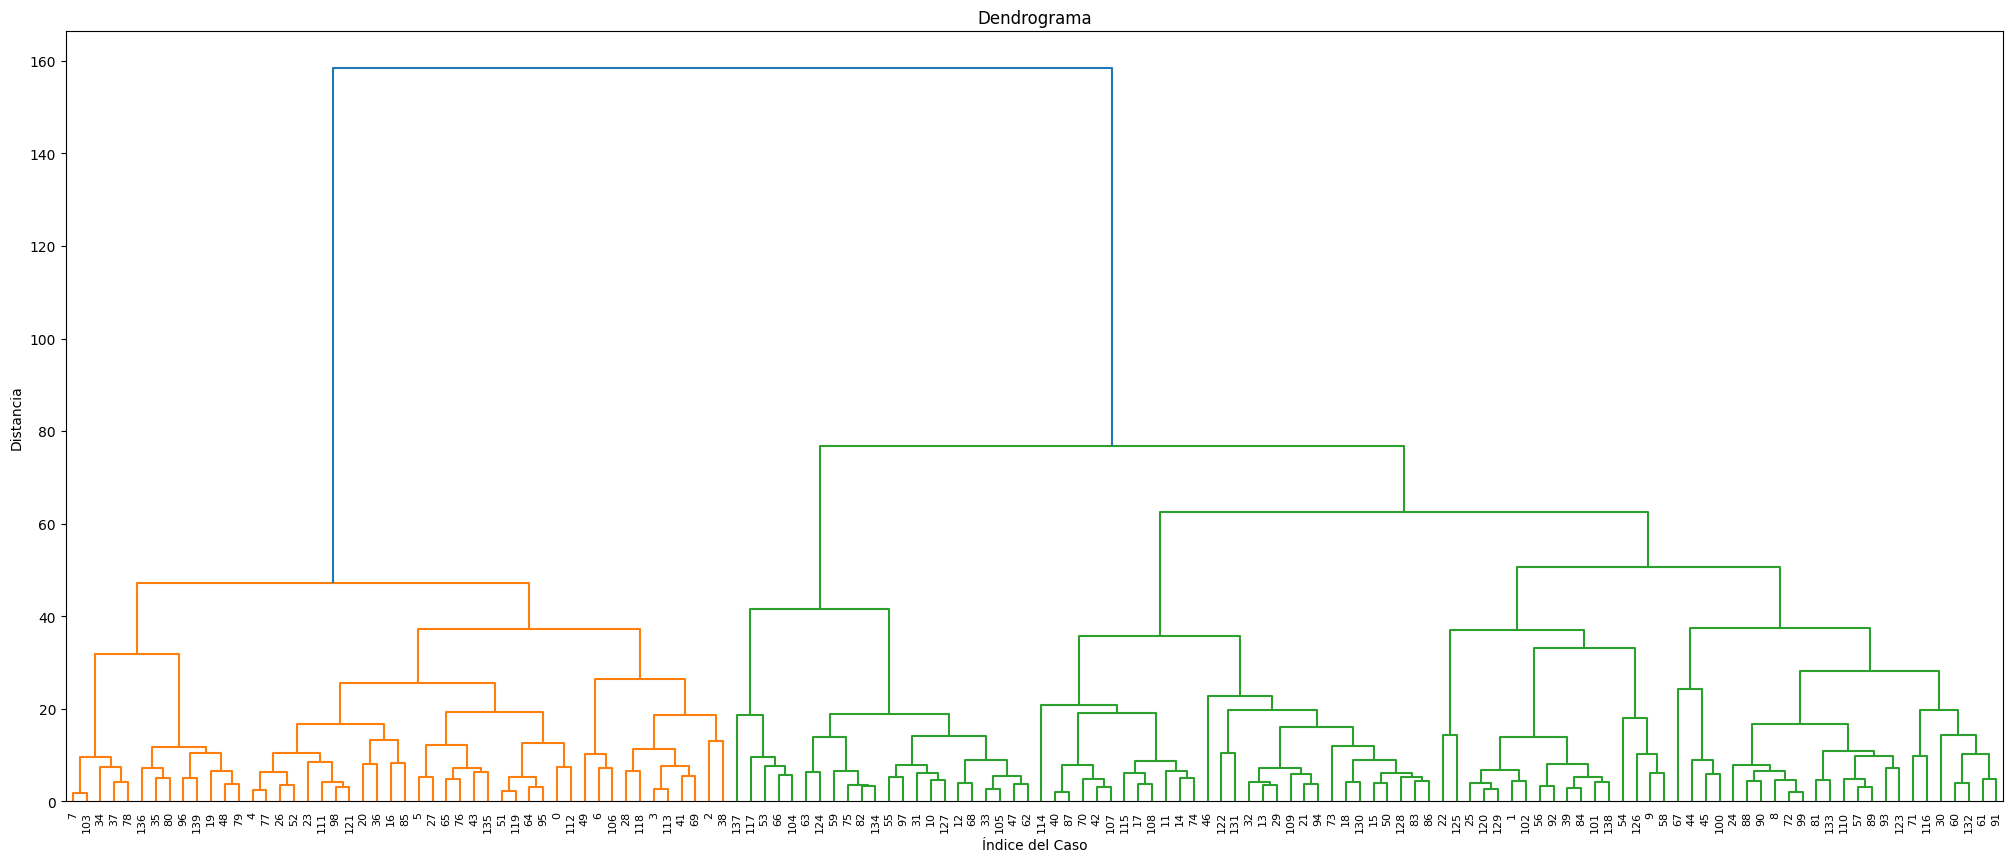

In [51]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Asumiendo que tienes un conjunto de datos X
# X = ...

# Generar los enlaces entre los puntos usando un método de linkage
Z = linkage(X, method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Índice del Caso')
plt.ylabel('Distancia')

dendrogram(
    Z,
    leaf_rotation=90.,  # Rota los nombres de las hojas
    leaf_font_size=8.,  # Tamaño de la fuente de las hojas
)

plt.show()


* Estructura en Árbol: El dendrograma tiene una estructura de árbol que comienza con cada punto de datos (o grupo de datos muy similares) como su propia rama. Estas ramas se fusionan con otras a medida que subes en el árbol, lo que indica que los puntos de datos o grupos de datos se están combinando en clústeres más grandes.

* Altura de las Fusiones: La altura en la que dos ramas se fusionan (verticalmente) indica la distancia o disimilitud entre esos dos clústeres. Una fusión a mayor altura significa que los clústeres son menos similares entre sí.

* Determinar el Número de Clústeres: Puedes determinar un número de clústeres al cortar el dendrograma horizontalmente. El número de líneas verticales que cruza tu línea horizontal es el número de clústeres a esa distancia. Por ejemplo, si cortas a una altura donde hay cinco líneas verticales cruzando, sugiere que hay cinco clústeres en esa altura de disimilitud.

* Identificación de Clústeres Grandes: Los clústeres grandes se identifican por las líneas horizontales más largas que no se han unido a otras ramas hacia la parte superior del dendrograma. Esto sugiere que estos clústeres son significativamente diferentes de otros clústeres.

Para interpretar tu dendrograma específico, buscarías el punto donde las líneas horizontales se unen a alturas mayores, lo que indica un buen punto para cortar y determinar el número óptimo de clústeres. Las ramas de color diferente generalmente representan diferentes clústeres a una cierta altura.